In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene, pearsonr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_stata("GSS2022.dta"); df

/tmp/ipykernel_27127/79525720.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata("GSS2022.dta"); df


,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,occ10,prestg10,indus10,...,rheight,instype01,instype02,instype03,instype04,totalincentive,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next
0,2022,1,working full time,40.0,NaN,NaN,someone else,"managers, all other",39.0,services incidental to transportation,...,64.0,employer/union based insurance,NaN,NaN,NaN,177,NaN,NaN,0.230979,0.267499
1,2022,2,retired,NaN,NaN,yes,someone else,marketing and sales managers,53.0,"data processing, hosting, and related services",...,NaN,NaN,NaN,NaN,NaN,$200+ in total payments,NaN,NaN,NaN,NaN
2,2022,3,working full time,52.0,NaN,NaN,someone else,personal care aides,48.0,"residential care facilities, without nursing",...,63.0,have no health insurance,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN
3,2022,4,"with a job, but not at work because of tempora...",NaN,25.0,NaN,someone else,"food servers, nonrestaurant",34.0,traveler accommodation,...,NaN,NaN,NaN,NaN,NaN,127,NaN,NaN,0.880743,1.089382
4,2022,5,other,NaN,NaN,yes,someone else,industrial and refractory machinery mechanics,38.0,electronic component and product manufacturing...,...,71.0,public health insurance,NaN,NaN,NaN,87,1.704444,3.219778,1.693235,2.121712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,2022,3541,working full time,48.0,NaN,NaN,someone else,"hotel, motel, and resort desk clerks",30.0,traveler accommodation,...,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN
3540,2022,3542,working full time,50.0,NaN,NaN,someone else,elementary and middle school teachers,61.0,hospitals,...,NaN,NaN,NaN,NaN,NaN,$200+ in total payments,NaN,NaN,NaN,NaN
3541,2022,3543,working full time,38.0,NaN,NaN,someone else,respiratory therapists,62.0,hospitals,...,NaN,NaN,NaN,NaN,NaN,107,NaN,NaN,NaN,NaN
3542,2022,3544,working full time,40.0,NaN,NaN,someone else,elementary and middle school teachers,61.0,elementary and secondary schools,...,65.0,employer/union based insurance,NaN,NaN,NaN,127,NaN,NaN,1.705899,1.196785


In [4]:
df.head(5)

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,occ10,prestg10,indus10,...,rheight,instype01,instype02,instype03,instype04,totalincentive,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next
0,2022,1,working full time,40.0,NaN,NaN,someone else,"managers, all other",39.0,services incidental to transportation,...,64.0,employer/union based insurance,NaN,NaN,NaN,177,NaN,NaN,0.230979,0.267499
1,2022,2,retired,NaN,NaN,yes,someone else,marketing and sales managers,53.0,"data processing, hosting, and related services",...,NaN,NaN,NaN,NaN,NaN,$200+ in total payments,NaN,NaN,NaN,NaN
2,2022,3,working full time,52.0,NaN,NaN,someone else,personal care aides,48.0,"residential care facilities, without nursing",...,63.0,have no health insurance,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN
3,2022,4,"with a job, but not at work because of tempora...",NaN,25.0,NaN,someone else,"food servers, nonrestaurant",34.0,traveler accommodation,...,NaN,NaN,NaN,NaN,NaN,127,NaN,NaN,0.880743,1.089382
4,2022,5,other,NaN,NaN,yes,someone else,industrial and refractory machinery mechanics,38.0,electronic component and product manufacturing...,...,71.0,public health insurance,NaN,NaN,NaN,87,1.704444,3.219778,1.693235,2.121712


In [5]:
df.isnull().sum().sum()

np.int64(1581685)

In [6]:
df.hrs1 = df.hrs1.astype(str)
df.childs = df.childs.astype(str)
df.tvhours = df.tvhours.astype(str)
df.realrinc = df.realrinc.astype(float)
df.educ = df.educ.astype(str)

In [7]:
df.hrs1 = df.hrs1.replace({"\+ hours": ""}, regex = True).astype(float)
df.childs = df.childs.replace({" or more": ""}, regex = True).astype(float)
df.tvhours = df.tvhours.replace({" hours": ""}, regex = True).astype(float)
df.educ = df.educ.replace({"no formal schooling": "0"}, regex = True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_27127/1249511473.py:1: SyntaxWarning: invalid escape sequence '\+'
  df.hrs1 = df.hrs1.replace({"\+ hours": ""}, regex = True).astype(float)


In [8]:
key_values = df.loc[:, ["sex", "hrs1", "childs", "tvhours", "realrinc", "educ"]]
key_values = key_values.dropna()

In [9]:
print(key_values)

         sex  hrs1  childs  tvhours      realrinc  educ
12    female  40.0     2.0      2.0   19620.00000  12.0
38    female  40.0     2.0      2.0   35970.00000  16.0
40    female  36.0     0.0      0.0   61040.00000  16.0
46    female  40.0     3.0      1.0   19620.00000  12.0
53      male  35.0     0.0      1.0   43600.00000  12.0
56    female  40.0     3.0      4.0   14170.00000  14.0
75      male  37.0     0.0      1.0   23980.00000  12.0
80    female  40.0     0.0      8.0   23980.00000  16.0
82      male  40.0     1.0      3.0   29430.00000  15.0
90    female  20.0     1.0      1.0   35970.00000  16.0
94      male  20.0     0.0      1.0   16350.00000  16.0
103     male  40.0     0.0      3.0   14170.00000  16.0
105     male  33.0     0.0      4.0   52320.00000  18.0
106     male  70.0     0.0      2.0  147659.41804  16.0
113     male  50.0     0.0      2.0   52320.00000  16.0
116     male  40.0     3.0      2.0   14170.00000  12.0
122   female  35.0     0.0      2.0   29430.0000

In [10]:
key_values.describe()

,hrs1,childs,tvhours,realrinc,educ
count,558.000000,558.000000,558.000000,558.000000,558.000000
mean,41.247312,0.629032,2.586022,30567.316837,14.571685
std,13.388537,1.103454,2.578523,33231.222874,2.767026
min,0.000000,0.000000,0.000000,218.000000,3.000000
25%,40.000000,0.000000,1.000000,11990.000000,12.000000
50%,40.000000,0.000000,2.000000,23980.000000,14.000000
75%,45.000000,1.000000,3.000000,35970.000000,16.000000
max,89.000000,8.000000,24.000000,147659.418040,20.000000


array([[<Axes: title={'center': 'hrs1'}>,
        <Axes: title={'center': 'childs'}>],
       [<Axes: title={'center': 'tvhours'}>,
        <Axes: title={'center': 'realrinc'}>],
       [<Axes: title={'center': 'educ'}>, <Axes: >]], dtype=object)

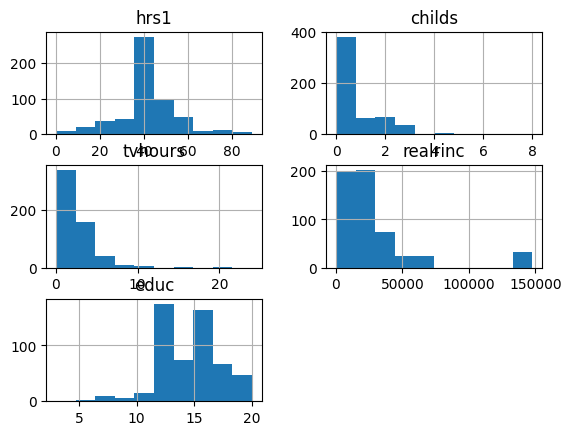

In [11]:
key_values.hist()

In [12]:
male = key_values[key_values.sex == "male"].hrs1
female = key_values[key_values.sex == "female"].hrs1

In [13]:
levene(male, female)

LeveneResult(statistic=np.float64(0.6019817776963685), pvalue=np.float64(0.4381527802830698))

In [14]:
sms.DescrStatsW(key_values.hrs1).tconfint_mean()

(np.float64(40.13402052898007), np.float64(42.36060312693391))

In [15]:
sms.DescrStatsW(key_values.childs).tconfint_mean()

(np.float64(0.5372771817274827), np.float64(0.7207873344015495))

In [16]:
sms.DescrStatsW(key_values.tvhours).tconfint_mean()

(np.float64(2.3716106751560027), np.float64(2.8004323355966854))

In [17]:
pearsonr(key_values.realrinc, key_values.educ)

PearsonRResult(statistic=np.float64(0.33748270080427345), pvalue=np.float64(2.4890742744097383e-16))

In [18]:
key_values[["educ", "realrinc", "hrs1"]].corr()

,educ,realrinc,hrs1
educ,1.000000,0.337483,0.022976
realrinc,0.337483,1.000000,0.224864
hrs1,0.022976,0.224864,1.000000


<Axes: xlabel='realrinc', ylabel='educ'>

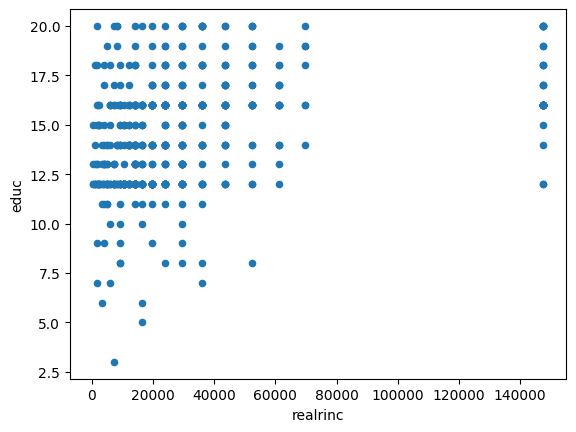

In [19]:
key_values.plot.scatter("realrinc", "educ")

In [20]:
y = key_values['realrinc']
X = key_values['educ']

In [21]:
X = sm.add_constant(X)

In [22]:
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realrinc   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     71.46
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.49e-16
Time:                        19:25:10   Log-Likelihood:                -6567.0
No. Observations:                 558   AIC:                         1.314e+04
Df Residuals:                     556   BIC:                         1.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.849e+04   7110.936     -4.007      0.000   -4.25e+04   -1.45e+04
educ        4053.0749    479.445      8.454      0.000    3111.331    4994.819
==============================================================================
Omnibus:                      284.609   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1338.376
Skew:                           2.360   Prob(JB):                    2.37e-291
Kurtosis:                       8.941   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis.** F-statistics is fairly high, meaning a possible relationship, but the model have nearly zero confidence in this prediction.

<Axes: ylabel='Count'>

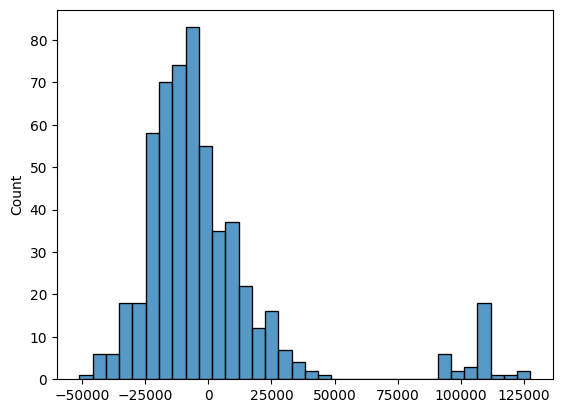

In [23]:
sns.histplot(model_result.resid)

In [24]:
mu, std = stats.norm.fit(model_result.resid)
mu, std

(np.float64(-6.717873410084769e-11), np.float64(31253.56185004883))

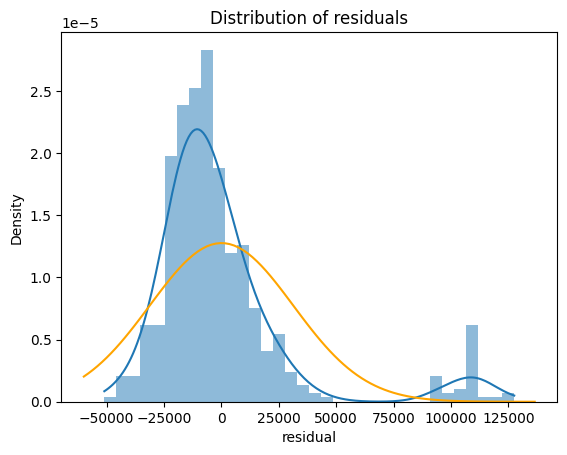

In [25]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

<Axes: xlabel='None'>

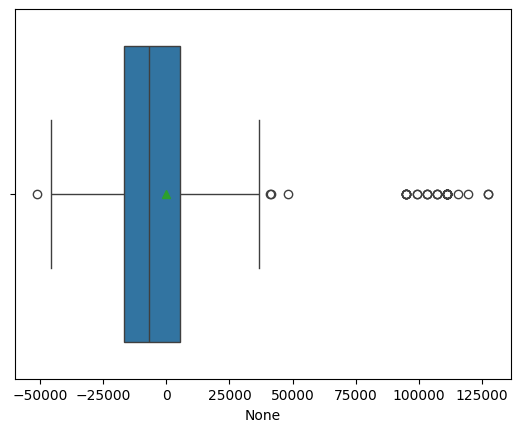

In [26]:
sns.boxplot(x=model_result.resid, showmeans=True)

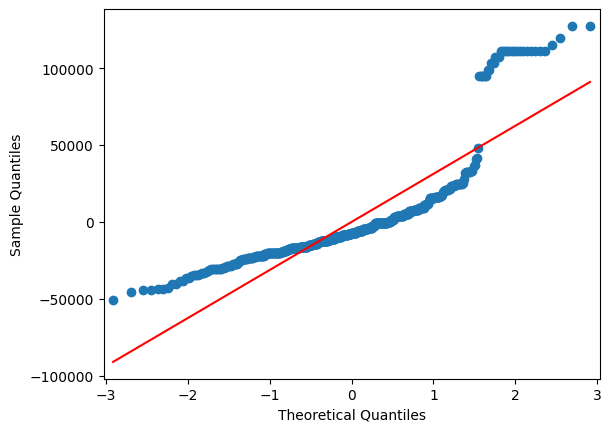

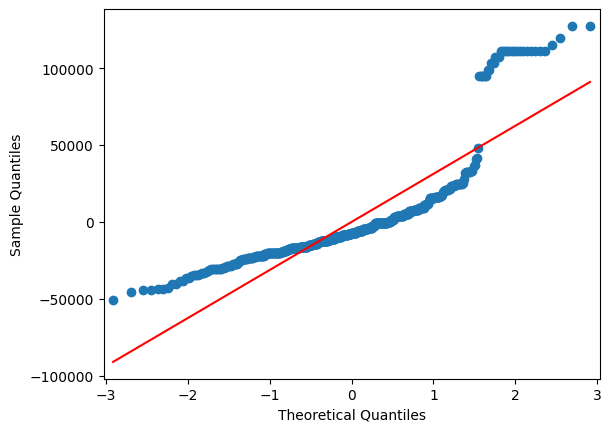

In [27]:
sm.qqplot(model_result.resid, line="s")

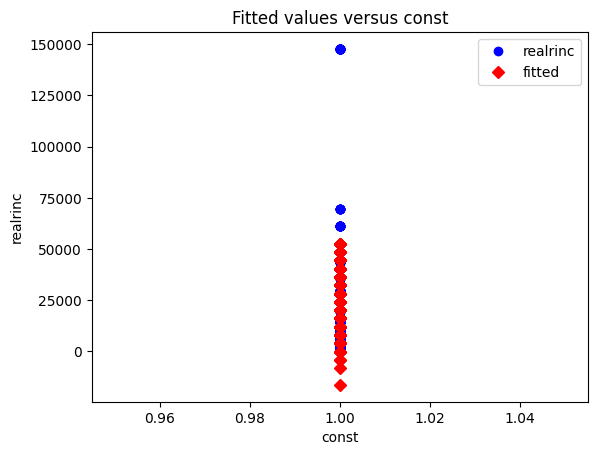

In [28]:
fig = sm.graphics.plot_fit(model_result, 0, vlines=False)
plt.show()

In [29]:
model_result.fittedvalues

12      20144.086699
38      36356.386120
40      36356.386120
46      20144.086699
53      20144.086699
56      28250.236410
75      20144.086699
80      36356.386120
82      32303.311265
90      36356.386120
94      36356.386120
103     36356.386120
105     44462.535830
106     36356.386120
113     36356.386120
116     20144.086699
122     36356.386120
132     40409.460975
139     36356.386120
150     16091.011844
155     36356.386120
158     36356.386120
170     52568.685541
172     36356.386120
175     28250.236410
178     24197.161554
181     44462.535830
182     36356.386120
183     20144.086699
184     36356.386120
192     44462.535830
196     36356.386120
199     24197.161554
210     40409.460975
212     40409.460975
215     32303.311265
219     32303.311265
221     28250.236410
224     32303.311265
226     36356.386120
227     36356.386120
234     -4174.362432
238     40409.460975
240     20144.086699
242     52568.685541
246    -16333.586998
255     28250.236410
257     20144

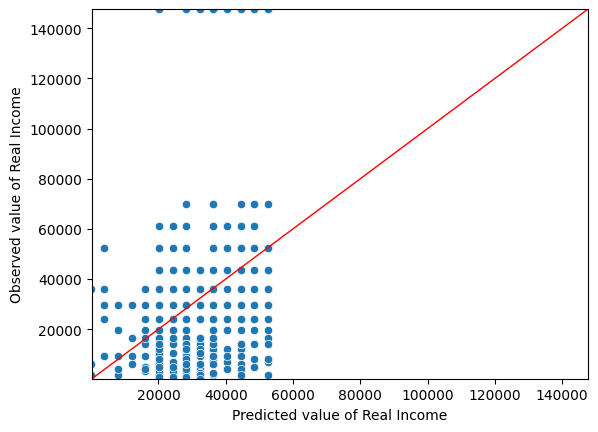

In [30]:
Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Real Income")
ax.set_ylabel("Observed value of Real Income")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

##### More independent variables

In [31]:
y = key_values['realrinc']
X = key_values[['educ', 'hrs1', 'tvhours']]

In [32]:
X = sm.add_constant(X)

In [39]:
ks = sm.OLS(y, X)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realrinc   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     36.76
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.11e-21
Time:                        19:30:13   Log-Likelihood:                -6550.1
No. Observations:                 558   AIC:                         1.311e+04
Df Residuals:                     554   BIC:                         1.313e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.599e+04   8177.211     -5.624      0.000    -6.2e+04   -2.99e+04
educ        3907.4451    468.465      8.341      0.000    2987.259    4827.631
hrs1         532.9178     96.388      5.529      0.000     343.587     722.249
tvhours     -914.2712    502.939     -1.818      0.070   -1902.172      73.630
==============================================================================
Omnibus:                      279.527   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.095
Skew:                           2.307   Prob(JB):                    1.99e-285
Kurtosis:                       8.925   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

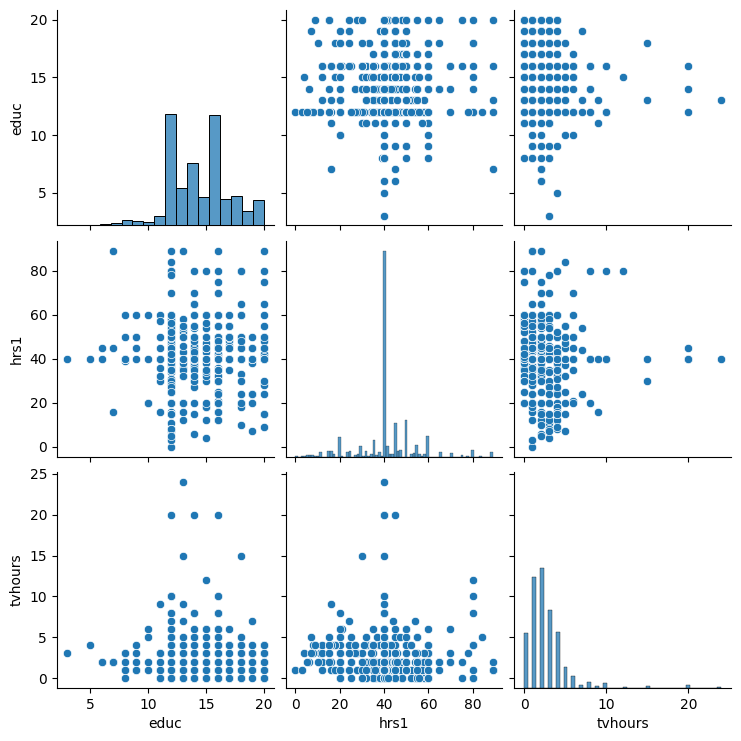

In [34]:
sns.pairplot(X[['educ', 'hrs1', 'tvhours']])

In [38]:
round(key_values[["educ", "realrinc", "hrs1"]].corr(), 2)

,educ,realrinc,hrs1
educ,1.00,0.34,0.02
realrinc,0.34,1.00,0.22
hrs1,0.02,0.22,1.00


/tmp/ipykernel_27127/156930061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks_res.resid, fit=stats.norm)


<Axes: ylabel='Density'>

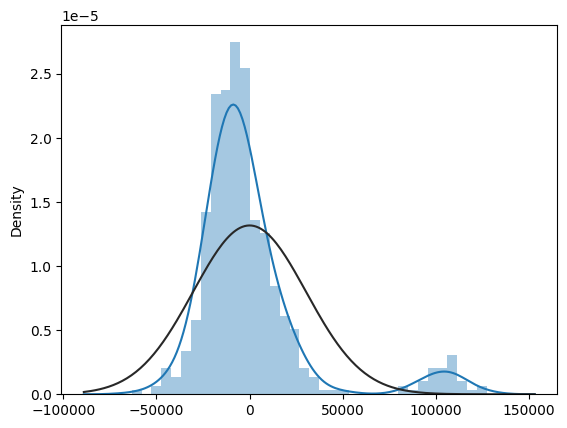

In [40]:
sns.distplot(ks_res.resid, fit=stats.norm)

<Axes: >

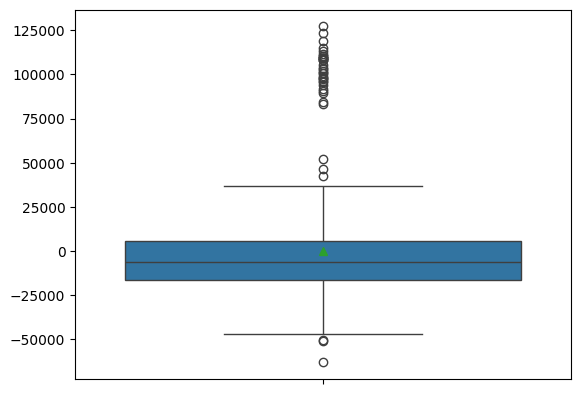

In [41]:
sns.boxplot(ks_res.resid, showmeans=True)

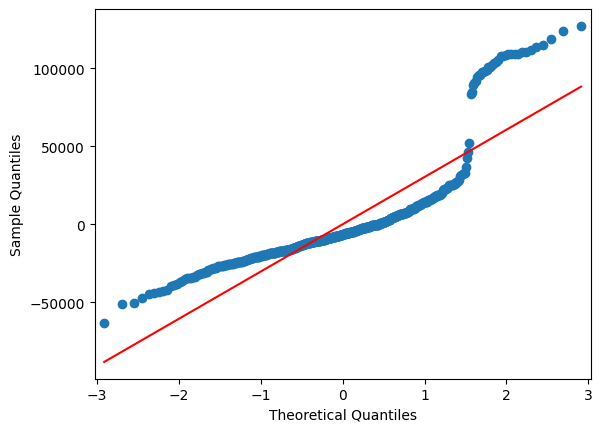

In [42]:
fig = sm.qqplot(ks_res.resid, line='s')
plt.show()

In [43]:
pd.DataFrame({'fit': ks_res.fittedvalues, 'y':  y})

,fit,y
12,20389.668522,19620.00000
38,36019.448805,35970.00000
40,35716.320133,61040.00000
46,21303.939691,19620.00000
53,18639.350928,43600.00000
56,26376.016326,14170.00000
75,19705.186433,23980.00000
80,30533.821792,23980.00000
82,31197.732565,29430.00000
90,26275.364924,35970.00000


In [44]:
pd.DataFrame({'fit': ks_res.fittedvalues, 'y':  y}).corr()

,fit,y
fit,1.000000,0.407469
y,0.407469,1.000000


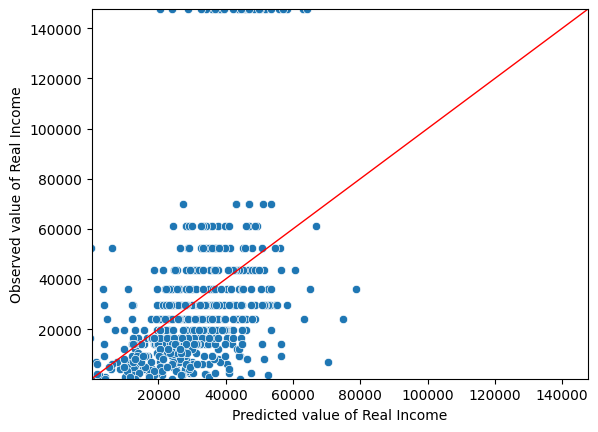

In [45]:
Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(x = ks_res.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Real Income")
ax.set_ylabel("Observed value of Real Income")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [46]:
y_norm = pd.Series(stats.zscore(y), name=y.name)
y_norm

0     -0.329724
1      0.162724
2      0.917812
3     -0.329724
4      0.392534
5     -0.493874
6     -0.198405
7     -0.198405
8     -0.034255
9      0.162724
10    -0.428214
11    -0.493874
12     0.655173
13     3.526718
14     0.655173
15    -0.493874
16    -0.034255
17    -0.198405
18     0.655173
19     0.162724
20    -0.329724
21     0.392534
22     3.526718
23     0.392534
24    -0.641608
25    -0.493874
26     0.392534
27    -0.740098
28    -0.034255
29     0.392534
30     0.655173
31     0.392534
32    -0.198405
33     0.392534
34    -0.034255
35    -0.198405
36     0.392534
37    -0.329724
38    -0.559534
39     3.526718
40    -0.740098
41    -0.822173
42    -0.034255
43    -0.772928
44    -0.329724
45    -0.707268
46    -0.674438
47    -0.428214
48     0.162724
49     0.162724
50    -0.198405
51     3.526718
52    -0.802475
53     0.392534
54    -0.493874
55    -0.329724
56    -0.034255
57    -0.772928
58    -0.707268
59    -0.674438
60    -0.559534
61    -0.608778
62     0

In [47]:
X_norm = X.loc[:, X.columns != "const"]
X_norm = pd.DataFrame(stats.zscore(X_norm))
X_norm = sm.add_constant(X_norm)
X_norm.columns = X.columns
check = pd.concat([round(X_norm.mean(axis=0)), round(X_norm.std(axis=0))], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
educ,0.0,1.0
hrs1,-0.0,1.0
tvhours,0.0,1.0


In [48]:
modstd = sm.OLS(y_norm, X_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realrinc   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     36.76
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.11e-21
Time:                        19:34:02   Log-Likelihood:                -741.11
No. Observations:                 558   AIC:                             1490.
Df Residuals:                     554   BIC:                             1508.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.475e-17      0.039   -3.8e-16      1.000      -0.076       0.076
educ           0.3254      0.039      8.341      0.000       0.249       0.402
hrs1           0.2147      0.039      5.529      0.000       0.138       0.291
tvhours       -0.0709      0.039     -1.818      0.070      -0.148       0.006
==============================================================================
Omnibus:                      279.527   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.095
Skew:                           2.307   Prob(JB):                    1.99e-285
Kurtosis:                       8.925   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

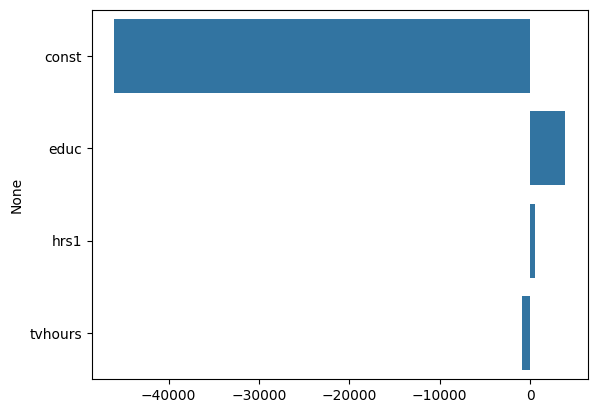

In [50]:
coeff = ks_res.params
#coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()] in order to sort coefficients
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

<Axes: ylabel='None'>

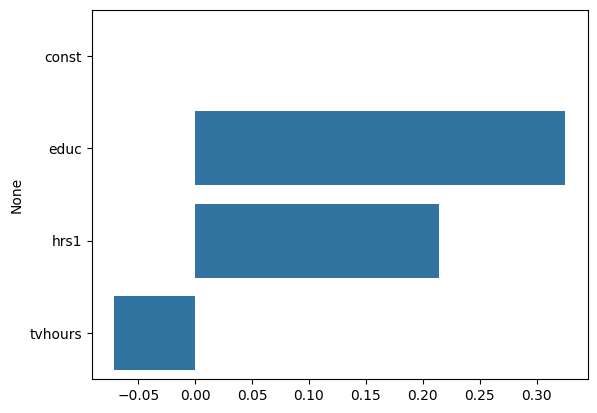

In [51]:
coeff = modstd_res.params
sns.barplot(x=coeff.values, y=coeff.index, orient='h')